In [ ]:
!unzip '/content/ahalytix_internship_hiring_ai_challenge-dataset.zip'

Archive:  /content/ahalytix_internship_hiring_ai_challenge-dataset.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd

df = pd.read_csv("TRAIN.csv")
df

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918
...,...,...,...,...,...,...,...,...,...
38558,2017-11-01 18:00:00,None,274.35,0.0,0.0,90,Snow,light snow,4297
38559,2017-11-01 19:00:00,None,274.62,0.0,0.0,90,Drizzle,light intensity drizzle,3045
38560,2017-11-01 19:00:00,None,274.62,0.0,0.0,90,Mist,mist,3045
38561,2017-11-01 19:00:00,None,274.62,0.0,0.0,90,Rain,light rain,3045


In [ ]:
testdf=pd.read_csv("TEST.csv")
sub=pd.read_csv('sample_submission.csv')

In [ ]:
testdf

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
0,2017-11-01 20:00:00,None,274.75,0.0,0.0,90,Mist,mist
1,2017-11-01 20:00:00,None,274.75,0.0,0.0,90,Rain,light rain
2,2017-11-01 21:00:00,None,274.79,0.0,0.0,90,Mist,mist
3,2017-11-01 21:00:00,None,274.79,0.0,0.0,90,Drizzle,drizzle
4,2017-11-01 22:00:00,None,275.08,0.0,0.0,90,Mist,mist
...,...,...,...,...,...,...,...,...
9636,2018-09-30 19:00:00,None,283.45,0.0,0.0,75,Clouds,broken clouds
9637,2018-09-30 20:00:00,None,282.76,0.0,0.0,90,Clouds,overcast clouds
9638,2018-09-30 21:00:00,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm
9639,2018-09-30 22:00:00,None,282.09,0.0,0.0,90,Clouds,overcast clouds


In [ ]:
sub

,Index,Value
0,0,2704
1,1,2704
2,2,2204
3,3,2204
4,4,1713
5,5,1713
6,6,1068
7,7,611
8,8,362
9,9,254


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:

x_train = df.drop('traffic_volume', axis=1)
y_train = df['traffic_volume']
x_test = testdf
all_data = pd.concat([x_train, x_test])

In [ ]:
all_data['timestamp'] = pd.to_datetime(all_data['date_time'])
all_data['weekday'] = all_data['timestamp'].dt.weekday
all_data['month'] = all_data['timestamp'].dt.month
all_data['hour'] = all_data['timestamp'].dt.hour
all_data = all_data.drop(['timestamp'], axis=1)

x_train = all_data[:len(x_train)]
x_test = all_data[len(x_train):]

print(x_train.info())
print(x_test.info())

del all_data['date_time']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38563 entries, 0 to 38562
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            38563 non-null  object 
 1   holiday              38563 non-null  object 
 2   temp                 38563 non-null  float64
 3   rain_1h              38563 non-null  float64
 4   snow_1h              38563 non-null  float64
 5   clouds_all           38563 non-null  int64  
 6   weather_main         38563 non-null  object 
 7   weather_description  38563 non-null  object 
 8   weekday              38563 non-null  int64  
 9   month                38563 non-null  int64  
 10  hour                 38563 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 3.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9641 entries, 0 to 9640
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------      

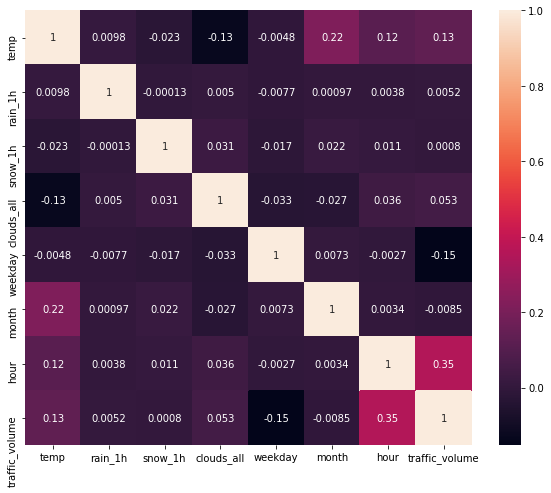

In [ ]:
x_y_train = x_train.copy(deep=True)
x_y_train['traffic_volume'] = df['traffic_volume']

corr = x_y_train.corr()
#Correlation with output variable
corr_target = abs(corr["traffic_volume"])
top_corr_features = corr_target.index

plt.figure(figsize=(10,8))

#plot heat map
heatmap=sns.heatmap(x_y_train[top_corr_features].corr(), annot=True)

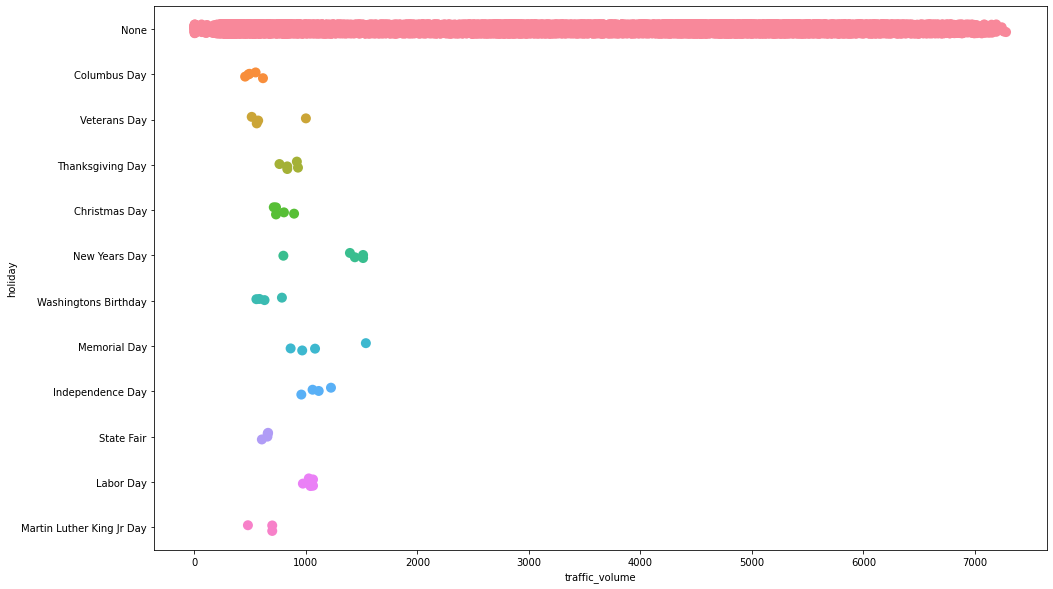

In [ ]:
plt.figure(figsize=(16, 10))
holiday = sns.stripplot(x=y_train, y="holiday", data=x_train, size=10)

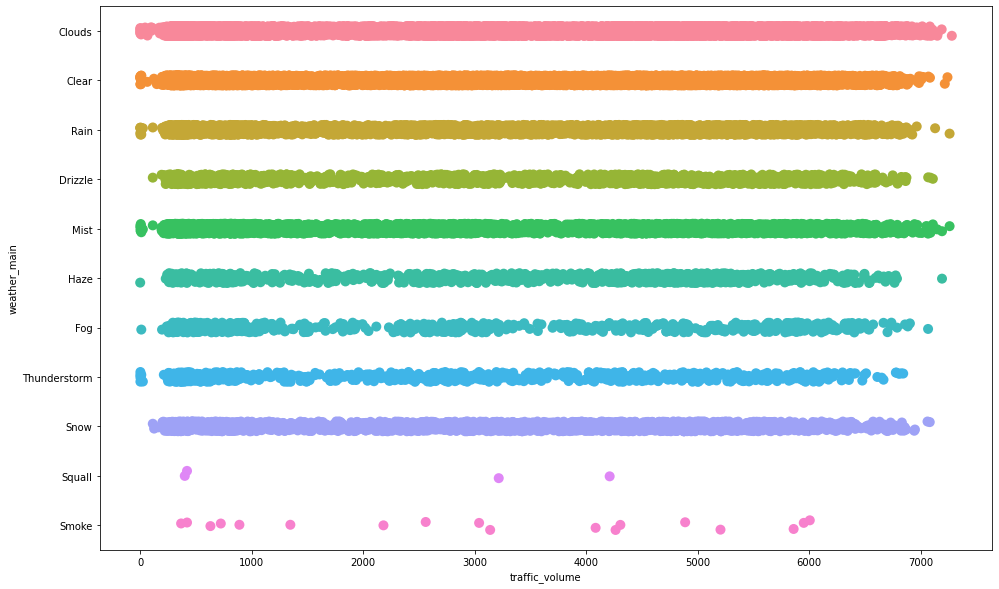

In [ ]:

plt.figure(figsize=(16, 10))
weather_main = sns.stripplot(x=y_train, y="weather_main", data=x_train, size=10)

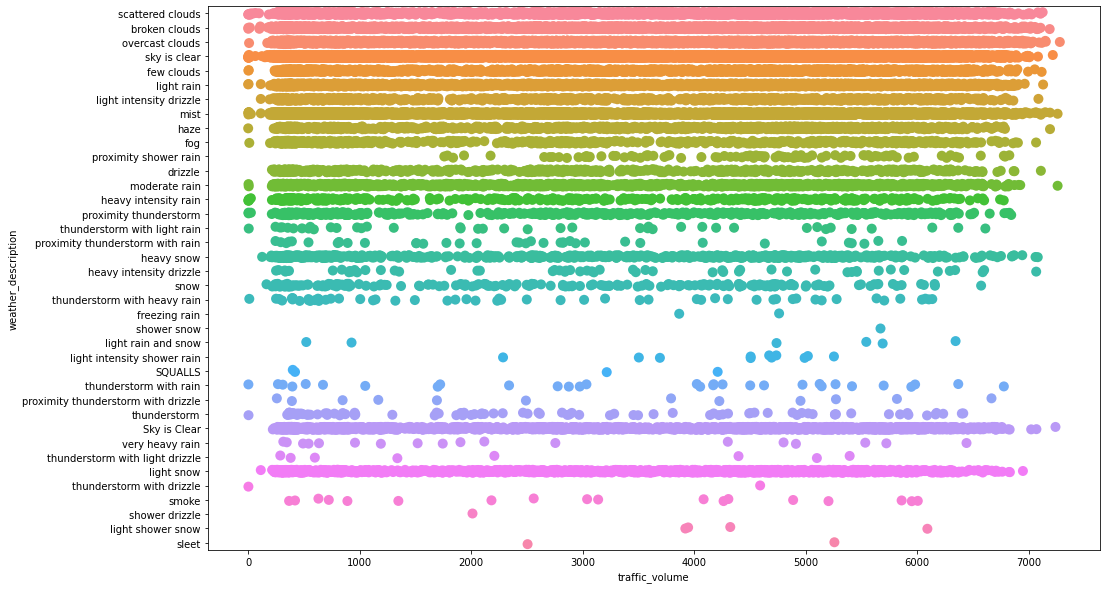

In [ ]:
plt.figure(figsize=(16, 10))
weather_description = sns.stripplot(x=y_train, y="weather_description", data=x_train, size=10)

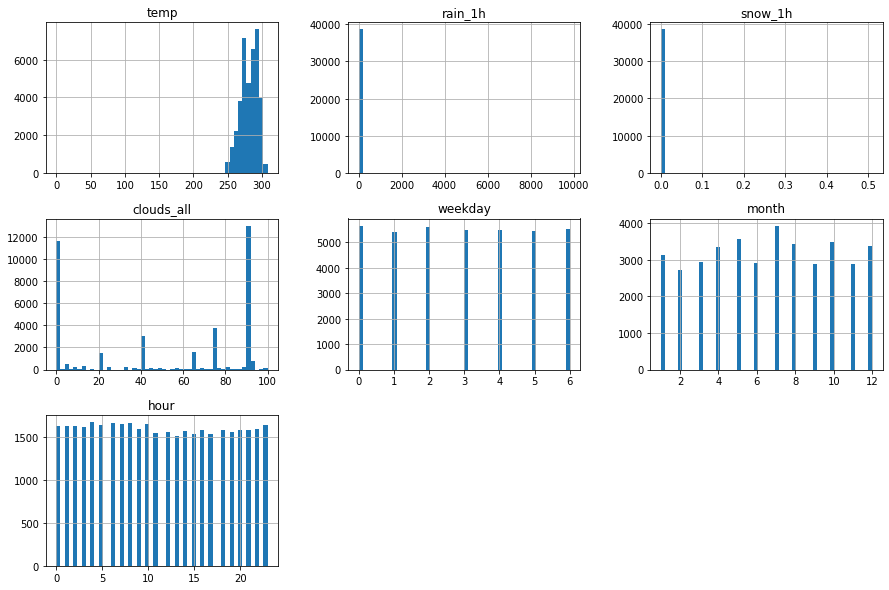

In [ ]:
x_train.hist(bins=50, figsize=(15,10))
plt.show()

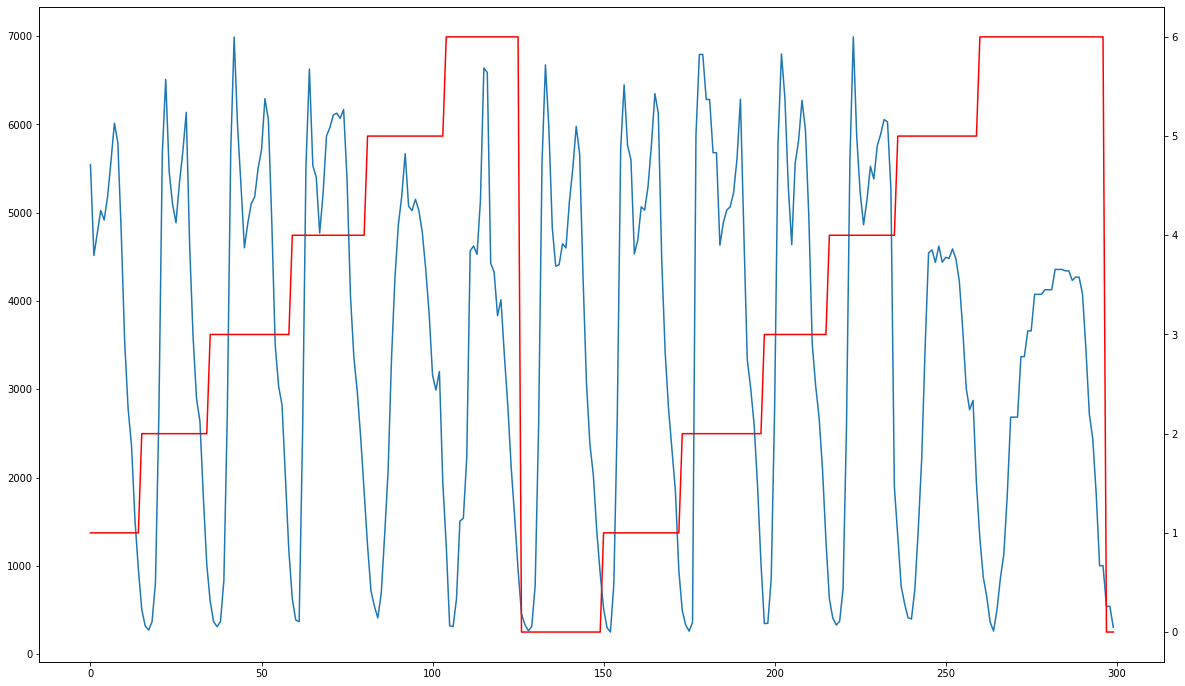

In [ ]:

size_resolution = 300
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.plot(x_train.weekday[0:size_resolution],'r')
ax1.plot(y_train[0:size_resolution])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(18.5, 10.5)

In [ ]:

holiday_dummy = pd.get_dummies(all_data['holiday'])
weather_main_dummy = pd.get_dummies(all_data['weather_main'])
weather_description_dummy = pd.get_dummies(all_data['weather_description'])

all_data.drop('holiday', axis=1, inplace=True)
all_data.drop('weather_main', axis=1, inplace=True)
all_data.drop('weather_description', axis=1, inplace=True)

In [ ]:
scaler =  StandardScaler()
scaler.fit(all_data)
all_data = scaler.transform(all_data)

In [ ]:
all_data = np.hstack((all_data, holiday_dummy, weather_main_dummy, weather_description_dummy))
x_train = all_data[:len(x_train)]
x_test = all_data[len(x_train):]

Text(0, 0.5, 'Cumulative explained variance ratio')

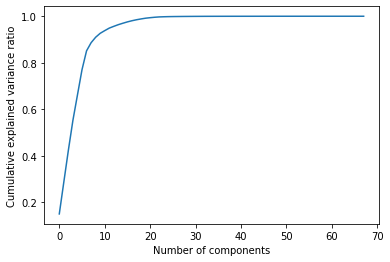

In [ ]:
pca = PCA().fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')

In [ ]:
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
# regressor = RandomForestRegressor()
regressor = XGBRegressor(n_estimators=600, max_depth=5)

In [ ]:
scores = cross_val_score(regressor, x_train, y_train, scoring="neg_mean_absolute_error", cv=30)


[13:06:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:10:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:10:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:11:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:12:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:

mae_scores = scores
# mae_scores = -scores
print("MAE ")
print("Scores:", mae_scores)
print("Mean:", mae_scores.mean())
print("Standard deviation:", mae_scores.std())

MAE 
Scores: [-249.57732981 -474.53538028 -348.76681516 -259.99620192 -278.04720388
 -307.8867614  -306.34577856 -354.39492782 -429.47746066 -316.49471708
 -236.52331625 -270.14395985 -282.24674365 -230.69285269 -275.21847324
 -380.74445017 -286.42180947 -224.04896709 -232.50374428 -505.70389553
 -318.15211595 -319.98076911 -457.59838145 -309.09379253 -242.71183975
 -189.37207753 -214.97824844 -266.96318497 -212.22796009 -235.86145964]
Mean: -300.55702060820255
Standard deviation: 79.34246036321731


In [ ]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(regressor, x_train, y_train, cv=30)

[13:31:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:34:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:34:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:36:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:37:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

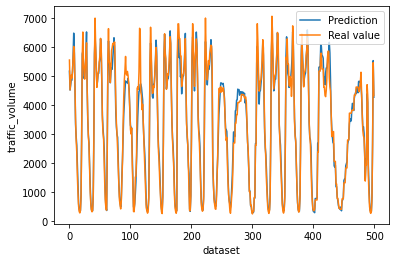

In [ ]:
size_resolution = 500
# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# ax2.plot( predictions[0:size_resolution],'r')
# ax1.plot(y_train[0:size_resolution],'-')
# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# fig.set_size_inches(18.5, 10.5)
plt.xlabel('dataset')
plt.ylabel('traffic_volume')
plt.plot(predictions[0:size_resolution], label='Prediction')
plt.plot(y_train[0:size_resolution], label='Real value')
plt.legend()
plt.show()

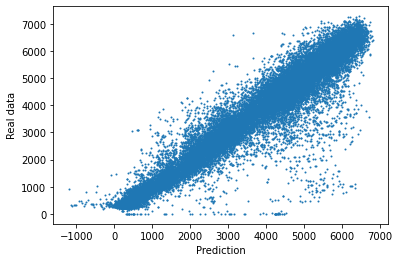

In [ ]:
plt.xlabel('Prediction')
plt.ylabel('Real data')
plt.plot(predictions, y_train, 'o',markersize=1)

In [ ]:
predictor = regressor.fit(x_train, y_train)
y_predict = predictor.predict(x_test)
np.savetxt('result.txt', y_predict, fmt='%d')

[13:56:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
submit = pd.DataFrame()
submit['Index'] =list(i for i in range(len(y_predict)))
submit['Value'] =list(i for i in range(len(y_predict)))
for i in range(len(y_predict)):
  submit.Value[i] = int(y_predict[i])

In [ ]:
submit

,Index,Value
0,0,2323
1,1,2408
2,2,1866
3,3,1960
4,4,1599
...,...,...
9636,9636,3342
9637,9637,2773
9638,9638,2309
9639,9639,1796


In [ ]:
submit.to_csv('output.csv',index=False)

In [ ]:
pip install pyspark

     |████████████████████████████████| 204.2MB 66kB/s 
     |████████████████████████████████| 204kB 49.2MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=a2615b2ee611599b3e909d6f1cc258cde2eb950bae8f55bb8355c5ff74907798
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [ ]:

from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

spark = SparkSession.builder.appName('Traffic Volume Prediction').getOrCreate()

# Create an sql context so that we can query data files in sql like syntax
sqlContext = SQLContext(spark)
spark

In [ ]:
df = spark.read.parquet('traffic_volume_feature_eng_df.parquet')

df.createOrReplaceTempView('df')
df.printSchema()

root
 |-- temp: string (nullable = true)
 |-- rain_1h: string (nullable = true)
 |-- snow_1h: string (nullable = true)
 |-- clouds_all: string (nullable = true)
 |-- traffic_volume: string (nullable = true)
 |-- month: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- hour_of_day: integer (nullable = true)
 |-- holidayIndex: integer (nullable = true)
 |-- weatherMainIndex: integer (nullable = true)
 |-- weatherDescIndex: integer (nullable = true)



In [ ]:
from pyspark.sql.types import IntegerType
from pyspark.sql.types import DoubleType
df = df.withColumn("temp", df["temp"].cast(DoubleType()))
df = df.withColumn("rain_1h", df["rain_1h"].cast(DoubleType()))
df = df.withColumn("snow_1h", df["snow_1h"].cast(DoubleType()))
df = df.withColumn("clouds_all", df["clouds_all"].cast(IntegerType()))
df = df.withColumn("traffic_volume", df["traffic_volume"].cast(IntegerType()))

In [ ]:
for column in df.columns:
    nulls = spark.sql('select count(*) from df where ' + column + ' is null').first()[0]
    print('null values in ' + column + ': ' + str(nulls))

null values in temp: 0
null values in rain_1h: 0
null values in snow_1h: 0
null values in clouds_all: 0
null values in traffic_volume: 0
null values in month: 0
null values in day_of_week: 0
null values in hour_of_day: 0
null values in holidayIndex: 0
null values in weatherMainIndex: 0
null values in weatherDescIndex: 0


In [ ]:
from pyspark.ml.feature import VectorAssembler


In [ ]:

vectorAssembler = VectorAssembler(inputCols=['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'month','day_of_week','hour_of_day', 'holidayIndex', 'weatherMainIndex', 'weatherDescIndex'],outputCol='features')

In [ ]:
from pyspark.ml.feature import MinMaxScaler


In [ ]:
minMaxScaler = MinMaxScaler(inputCol='features', outputCol='features_norm')


In [ ]:
from pyspark.ml import Pipeline


In [ ]:
pipeline = Pipeline(stages=[vectorAssembler, minMaxScaler])
df = pipeline.fit(df).transform(df)

df.printSchema()

root
 |-- temp: double (nullable = true)
 |-- rain_1h: double (nullable = true)
 |-- snow_1h: double (nullable = true)
 |-- clouds_all: integer (nullable = true)
 |-- traffic_volume: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- hour_of_day: integer (nullable = true)
 |-- holidayIndex: integer (nullable = true)
 |-- weatherMainIndex: integer (nullable = true)
 |-- weatherDescIndex: integer (nullable = true)
 |-- features: vector (nullable = true)
 |-- features_norm: vector (nullable = true)



In [ ]:
df.select('features', 'features_norm').show(5, truncate=False)


+-----------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------+
|features                                       |features_norm                                                                                                                          |
+-----------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------+
|[280.44,0.0,0.0,87.0,10.0,5.0,2.0,0.0,3.0,3.0] |[0.5713184271395528,0.0,0.0,0.87,0.8181818181818182,0.6666666666666666,0.08695652173913043,0.0,0.30000000000000004,0.08823529411764705]|
|[280.57,0.0,0.0,40.0,10.0,1.0,2.0,0.0,0.0,4.0] |(10,[0,3,4,6,9],[0.5733230531996916,0.4,0.8181818181818182,0.08695652173913043,0.11764705882352941])                                   |
|[276.98,0.0,0.0,90.0,11.0,7.0,21.0,0.0,0.0,1.0]|[0.5179645335389363,0

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

In [ ]:
columns = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume', 'month','day_of_week', \
           'hour_of_day', 'holidayIndex', 'weatherMainIndex', 'weatherDescIndex']

In [ ]:
unlist = udf(lambda x: round(float(list(x)[0]), 7), DoubleType())
# Iterating over columns to be scaled
for column in columns:
    # VectorAssembler Transformation - Converting column to vector type
    assembler = VectorAssembler(inputCols=[column],outputCol=column+"_Vect")
    # MinMaxScaler Transformation
    scaler = MinMaxScaler(inputCol=column+"_Vect", outputCol=column+"_Norm")
    # Pipeline of VectorAssembler and MinMaxScaler
    pipeline = Pipeline(stages=[assembler, scaler])
    # Fitting pipeline on dataframe
    df = pipeline.fit(df).transform(df).withColumn(column+"_Norm", unlist(column+"_Norm")).drop(column+"_Vect")
df.createOrReplaceTempView('df')

In [ ]:

df.createOrReplaceTempView('df')
df.printSchema()

root
 |-- temp: double (nullable = true)
 |-- rain_1h: double (nullable = true)
 |-- snow_1h: double (nullable = true)
 |-- clouds_all: integer (nullable = true)
 |-- traffic_volume: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- hour_of_day: integer (nullable = true)
 |-- holidayIndex: integer (nullable = true)
 |-- weatherMainIndex: integer (nullable = true)
 |-- weatherDescIndex: integer (nullable = true)
 |-- features: vector (nullable = true)
 |-- features_norm: vector (nullable = true)
 |-- temp_Norm: double (nullable = true)
 |-- rain_1h_Norm: double (nullable = true)
 |-- snow_1h_Norm: double (nullable = true)
 |-- clouds_all_Norm: double (nullable = true)
 |-- traffic_volume_Norm: double (nullable = true)
 |-- month_Norm: double (nullable = true)
 |-- day_of_week_Norm: double (nullable = true)
 |-- hour_of_day_Norm: double (nullable = true)
 |-- holidayIndex_Norm: double (nullable = true)
 |-- weatherMainIndex_N

In [ ]:
df_train, df_val, df_test = df.randomSplit([0.7, 0.2, 0.1], seed=12345)
    
print('Number of rows in the training dataframe: {}'.format(df_train.count()))
print('Number of rows in the validation dataframe: {}'.format(df_val.count()))
print('Number of rows in the testing dataframe: {}'.format(df_test.count()))

Number of rows in the training dataframe: 22770
Number of rows in the validation dataframe: 6465
Number of rows in the testing dataframe: 3371


In [ ]:
df_train.createOrReplaceTempView('df_train')
df_val.createOrReplaceTempView('df_val')
df_test.createOrReplaceTempView('df_test')

In [ ]:
from pyspark.ml.regression import RandomForestRegressor


In [ ]:
evaluator = RegressionEvaluator().setMetricName('r2').setPredictionCol("prediction").setLabelCol("traffic_volume")


In [ ]:
randomForestRegressor = RandomForestRegressor(labelCol='traffic_volume', featuresCol='features_norm', predictionCol='prediction')

ndl_model_rfr = randomForestRegressor.fit(df_train)
ndl_prediction_rfr = ndl_model_rfr.transform(df_train)
ndl_score_rfr = evaluator.evaluate(ndl_prediction_rfr)

print('\tEvaluation Score: ', ndl_score_rfr)

	Evaluation Score:  0.7255460612548651


In [ ]:

model_params = randomForestRegressor.extractParamMap()
for param, value in model_params.items():
    print(param, '=>', value)

RandomForestRegressor_87fe7644eb52__seed => -2445783334285517406
RandomForestRegressor_87fe7644eb52__maxDepth => 5
RandomForestRegressor_87fe7644eb52__maxBins => 32
RandomForestRegressor_87fe7644eb52__minInstancesPerNode => 1
RandomForestRegressor_87fe7644eb52__minInfoGain => 0.0
RandomForestRegressor_87fe7644eb52__maxMemoryInMB => 256
RandomForestRegressor_87fe7644eb52__cacheNodeIds => False
RandomForestRegressor_87fe7644eb52__checkpointInterval => 10
RandomForestRegressor_87fe7644eb52__impurity => variance
RandomForestRegressor_87fe7644eb52__subsamplingRate => 1.0
RandomForestRegressor_87fe7644eb52__numTrees => 20
RandomForestRegressor_87fe7644eb52__featureSubsetStrategy => auto
RandomForestRegressor_87fe7644eb52__leafCol => 
RandomForestRegressor_87fe7644eb52__minWeightFractionPerNode => 0.0
RandomForestRegressor_87fe7644eb52__bootstrap => True
RandomForestRegressor_87fe7644eb52__predictionCol => prediction
RandomForestRegressor_87fe7644eb52__featuresCol => features_norm
RandomFores

In [ ]:
rfr_model_pl = Pipeline(stages=[randomForestRegressor])

In [ ]:
rfr_model_pl.write().overwrite().save('rfr_model_pl.pkl')


In [ ]:
from pyspark.ml import Pipeline


In [ ]:
rfr_model_pl = Pipeline.load('rfr_model_pl.pkl')
rfr_model_pl.getStages()

[RandomForestRegressor_87fe7644eb52]

In [ ]:
randomForestRegressor = rfr_model_pl.getStages()[-1]
model_params = randomForestRegressor.extractParamMap()
for param, value in model_params.items():
    print(param, '=>', value)

RandomForestRegressor_87fe7644eb52__bootstrap => True
RandomForestRegressor_87fe7644eb52__cacheNodeIds => False
RandomForestRegressor_87fe7644eb52__checkpointInterval => 10
RandomForestRegressor_87fe7644eb52__featureSubsetStrategy => auto
RandomForestRegressor_87fe7644eb52__featuresCol => features_norm
RandomForestRegressor_87fe7644eb52__impurity => variance
RandomForestRegressor_87fe7644eb52__labelCol => traffic_volume
RandomForestRegressor_87fe7644eb52__leafCol => 
RandomForestRegressor_87fe7644eb52__maxBins => 32
RandomForestRegressor_87fe7644eb52__maxDepth => 5
RandomForestRegressor_87fe7644eb52__maxMemoryInMB => 256
RandomForestRegressor_87fe7644eb52__minInfoGain => 0.0
RandomForestRegressor_87fe7644eb52__minInstancesPerNode => 1
RandomForestRegressor_87fe7644eb52__minWeightFractionPerNode => 0.0
RandomForestRegressor_87fe7644eb52__numTrees => 20
RandomForestRegressor_87fe7644eb52__predictionCol => prediction
RandomForestRegressor_87fe7644eb52__seed => -2445783334285517406
RandomF

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator().setMetricName('r2').setPredictionCol("prediction").setLabelCol("traffic_volume")

In [ ]:
ndl_model_rfr = randomForestRegressor.fit(df_train)
ndl_prediction_rfr = ndl_model_rfr.transform(df_train)
ndl_score_rfr = evaluator.evaluate(ndl_prediction_rfr)

print('\tScore: ', ndl_score_rfr)

	Score:  0.7255460612548651


In [ ]:
from pyspark.ml.regression import GBTRegressor

In [ ]:
gbtRegressor = GBTRegressor(labelCol='traffic_volume', featuresCol='features_norm', predictionCol='prediction')

ndl_model_gbt = gbtRegressor.fit(df_train)
ndl_prediction_gbt = ndl_model_gbt.transform(df_train)
ndl_score_gbt = evaluator.evaluate(ndl_prediction_gbt)

print('\tScore: ', ndl_score_gbt)

	Score:  0.7972487627722786


In [ ]:

model_params = gbtRegressor.extractParamMap()
for param, value in model_params.items():
    print(param, '=>', value)

GBTRegressor_f5455cdc6aa5__seed => 7984791886199543483
GBTRegressor_f5455cdc6aa5__maxDepth => 5
GBTRegressor_f5455cdc6aa5__maxBins => 32
GBTRegressor_f5455cdc6aa5__minInstancesPerNode => 1
GBTRegressor_f5455cdc6aa5__minInfoGain => 0.0
GBTRegressor_f5455cdc6aa5__maxMemoryInMB => 256
GBTRegressor_f5455cdc6aa5__cacheNodeIds => False
GBTRegressor_f5455cdc6aa5__subsamplingRate => 1.0
GBTRegressor_f5455cdc6aa5__checkpointInterval => 10
GBTRegressor_f5455cdc6aa5__lossType => squared
GBTRegressor_f5455cdc6aa5__maxIter => 20
GBTRegressor_f5455cdc6aa5__stepSize => 0.1
GBTRegressor_f5455cdc6aa5__impurity => variance
GBTRegressor_f5455cdc6aa5__featureSubsetStrategy => all
GBTRegressor_f5455cdc6aa5__validationTol => 0.01
GBTRegressor_f5455cdc6aa5__leafCol => 
GBTRegressor_f5455cdc6aa5__minWeightFractionPerNode => 0.0
GBTRegressor_f5455cdc6aa5__predictionCol => prediction
GBTRegressor_f5455cdc6aa5__featuresCol => features_norm
GBTRegressor_f5455cdc6aa5__labelCol => traffic_volume


In [ ]:
randomForestRegressor.set(randomForestRegressor.getParam('featureSubsetStrategy'), 'all')

ndl_model_rfr = randomForestRegressor.fit(df_train)
ndl_prediction_rfr = ndl_model_rfr.transform(df_train)
ndl_score_rfr = evaluator.evaluate(ndl_prediction_rfr)

print('\tScore: ', ndl_score_rfr)

	Score:  0.7789697306082695


In [ ]:
maxDepths = [5, 10, 15, 20]
minInfoGains = [0, 0.3, 0.5]

score_max = 0

# Run the Grid Search
for maxDepth in maxDepths:
    gbtRegressor.set(gbtRegressor.getParam('maxDepth'), maxDepth)
    for minInfoGain in minInfoGains:
        gbtRegressor.set(gbtRegressor.getParam('minInfoGain'), minInfoGain)
        score = evaluator.evaluate(gbtRegressor.fit(df_train).transform(df_train))
        print('\tFor maxDepth = {}, minInfoGain = {} => score = {}'.format(maxDepth, minInfoGain, score))
        if score > score_max:
            score_max = score
            maxDepth_max = maxDepth
            minInfoGain_max = minInfoGain

print('Maximum score {} was achieved with maxDepth {} and minInfoGain {}'.format(score_max, maxDepth_max, minInfoGain_max))

	For maxDepth = 5, minInfoGain = 0 => score = 0.7972487627722786
	For maxDepth = 5, minInfoGain = 0.3 => score = 0.7972487627722786
	For maxDepth = 5, minInfoGain = 0.5 => score = 0.7972487627722786
	For maxDepth = 10, minInfoGain = 0 => score = 0.874699549604673
	For maxDepth = 10, minInfoGain = 0.3 => score = 0.8746995495593113
	For maxDepth = 10, minInfoGain = 0.5 => score = 0.8746995496292053
	For maxDepth = 15, minInfoGain = 0 => score = 0.9747793380471677
	For maxDepth = 15, minInfoGain = 0.3 => score = 0.9748036092455343
	For maxDepth = 15, minInfoGain = 0.5 => score = 0.9748036084699541
	For maxDepth = 20, minInfoGain = 0 => score = 0.9888413790828231


KeyboardInterrupt: ignored

In [ ]:
gbtRegressor = GBTRegressor(labelCol='traffic_volume', featuresCol='features_norm', predictionCol='prediction', maxDepth=20)


In [ ]:
gbt_ndl_model_pl = Pipeline(stages=[gbtRegressor])
gbt_ndl_model_pl.write().overwrite().save('gbt_model_pl.pkl')

In [ ]:
gbt_model_pl = Pipeline.load('gbt_model_pl.pkl')
gbt_model_pl.getStages()

[GBTRegressor_ce1d96bfa2a2]

In [ ]:
gbtRegressor = gbt_model_pl.getStages()[-1]
model_params = gbtRegressor.extractParamMap()
for param, value in model_params.items():
    print(param, '=>', value)

GBTRegressor_ce1d96bfa2a2__cacheNodeIds => False
GBTRegressor_ce1d96bfa2a2__checkpointInterval => 10
GBTRegressor_ce1d96bfa2a2__featureSubsetStrategy => all
GBTRegressor_ce1d96bfa2a2__featuresCol => features_norm
GBTRegressor_ce1d96bfa2a2__impurity => variance
GBTRegressor_ce1d96bfa2a2__labelCol => traffic_volume
GBTRegressor_ce1d96bfa2a2__leafCol => 
GBTRegressor_ce1d96bfa2a2__lossType => squared
GBTRegressor_ce1d96bfa2a2__maxBins => 32
GBTRegressor_ce1d96bfa2a2__maxDepth => 20
GBTRegressor_ce1d96bfa2a2__maxIter => 20
GBTRegressor_ce1d96bfa2a2__maxMemoryInMB => 256
GBTRegressor_ce1d96bfa2a2__minInfoGain => 0.0
GBTRegressor_ce1d96bfa2a2__minInstancesPerNode => 1
GBTRegressor_ce1d96bfa2a2__minWeightFractionPerNode => 0.0
GBTRegressor_ce1d96bfa2a2__predictionCol => prediction
GBTRegressor_ce1d96bfa2a2__seed => 7984791886199543483
GBTRegressor_ce1d96bfa2a2__stepSize => 0.1
GBTRegressor_ce1d96bfa2a2__subsamplingRate => 1.0
GBTRegressor_ce1d96bfa2a2__validationTol => 0.01


In [ ]:
evaluator = RegressionEvaluator().setMetricName('r2').setPredictionCol("prediction").setLabelCol("traffic_volume")


In [ ]:
ndl_model_gbt = gbtRegressor.fit(df_train)
gbt_prediction_train = ndl_model_gbt.transform(df_train)
gbt_score_train = evaluator.evaluate(gbt_prediction_train)

print('\tR-Squared score on training data set: ', gbt_score_train)

KeyboardInterrupt: ignored

In [ ]:
maxDepth_list = [7, 8, 9, 10, 11, 12, 13, 14, 15, 19]

score_train_list = []
score_val_list = []
score_test_list = []

# maxDepth_arr = np.array(maxDepth_list)
# score_arr = np.array(score_list)

# Run the Grid Search
for maxDepth in maxDepth_list:
    print('\nFor maxDepth = {}:'.format(maxDepth))
    
    gbtRegressor.set(gbtRegressor.getParam('maxDepth'), maxDepth)
    ndl_model_gbt = gbtRegressor.fit(df_train)
    
    gbt_prediction_train = ndl_model_gbt.transform(df_train)
    gbt_score_train = evaluator.evaluate(gbt_prediction_train)
    score_train_list.append(gbt_score_train)
    
    gbt_prediction_val = ndl_model_gbt.transform(df_val)
    gbt_score_val = evaluator.evaluate(gbt_prediction_val)
    score_val_list.append(gbt_score_val)
    
    gbt_prediction_test = ndl_model_gbt.transform(df_test)
    gbt_score_test = evaluator.evaluate(gbt_prediction_test)
    score_test_list.append(gbt_score_test)

    print('\tR-Squared score on training data set: ', gbt_score_train)
    print('\tR-Squared score on validation data set: ', gbt_score_val)
    print('\tR-Squared score on test data set: ', gbt_score_test)
print('\n')


For maxDepth = 7:
	R-Squared score on training data set:  0.8220186251077182
	R-Squared score on validation data set:  0.7977314808466804
	R-Squared score on test data set:  0.8205819245545667

For maxDepth = 8:
	R-Squared score on training data set:  0.8397074327425373
	R-Squared score on validation data set:  0.7975817570504294
	R-Squared score on test data set:  0.8196745101595481

For maxDepth = 9:
	R-Squared score on training data set:  0.8565543860085836
	R-Squared score on validation data set:  0.7979384473699841
	R-Squared score on test data set:  0.8222857060995121

For maxDepth = 10:
	R-Squared score on training data set:  0.874699549604673
	R-Squared score on validation data set:  0.7843953004358074
	R-Squared score on test data set:  0.8105782654381791

For maxDepth = 11:
	R-Squared score on training data set:  0.9021143133061373
	R-Squared score on validation data set:  0.7872622938810467
	R-Squared score on test data set:  0.8120291331548708

For maxDepth = 12:
	R-Square

KeyboardInterrupt: ignored

In [ ]:
from pyspark.ml.regression import RandomForestRegressor

In [ ]:
rfrRegressor = RandomForestRegressor(featuresCol='features_norm', labelCol='traffic_volume', \
                                     predictionCol='prediction', maxDepth=20)

In [ ]:

maxDepth_list = [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

score_train_list = []
score_val_list = []
score_test_list = []

# Run the Grid Search
for maxDepth in maxDepth_list:
    print('\nFor maxDepth = {}:'.format(maxDepth))
    
    rfrRegressor.set(rfrRegressor.getParam('maxDepth'), maxDepth)
    ndl_model_rfr = rfrRegressor.fit(df_train)
    
    rfr_prediction_train = ndl_model_rfr.transform(df_train)
    rfr_score_train = evaluator.evaluate(rfr_prediction_train)
    score_train_list.append(rfr_score_train)
    
    rfr_prediction_val = ndl_model_rfr.transform(df_val)
    rfr_score_val = evaluator.evaluate(rfr_prediction_val)
    score_val_list.append(rfr_score_val)
    
    rfr_prediction_test = ndl_model_rfr.transform(df_test)
    rfr_score_test = evaluator.evaluate(rfr_prediction_test)
    score_test_list.append(rfr_score_test)

    print('\tR-Squared score on training data set: ', rfr_score_train)
    print('\tR-Squared score on validation data set: ', rfr_score_val)
    print('\tR-Squared score on test data set: ', rfr_score_test)
print('\n')


For maxDepth = 14:
	R-Squared score on training data set:  0.8555821845895174
	R-Squared score on validation data set:  0.7965750161487916
	R-Squared score on test data set:  0.8198611725302268

For maxDepth = 15:
	R-Squared score on training data set:  0.8697322345065003
	R-Squared score on validation data set:  0.7969184758647547
	R-Squared score on test data set:  0.8215416238950108

For maxDepth = 16:
	R-Squared score on training data set:  0.8830757960759565
	R-Squared score on validation data set:  0.7982427058740356
	R-Squared score on test data set:  0.8218162015308734

For maxDepth = 17:
	R-Squared score on training data set:  0.8950414146314406
	R-Squared score on validation data set:  0.7984761419050017
	R-Squared score on test data set:  0.8230857253816318

For maxDepth = 18:
	R-Squared score on training data set:  0.9048507223038675
	R-Squared score on validation data set:  0.7984762387188653
	R-Squared score on test data set:  0.8241133436203129

For maxDepth = 19:
	R-Sq

KeyboardInterrupt: ignored